In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve
import warnings
warnings.filterwarnings("ignore")

# Exploratory Data Analysis(EDA)

In [117]:
df = pd.read_csv("credit_train.csv")

In [118]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [119]:
df.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Annual Income', 'Years in current job',
       'Home Ownership', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

In [120]:
df['Loan Status'].value_counts()

Fully Paid     77361
Charged Off    22639
Name: Loan Status, dtype: int64

In [121]:
df.shape

(100514, 19)

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

In [123]:
df.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


<AxesSubplot:title={'center':'Correlation for every column'}>

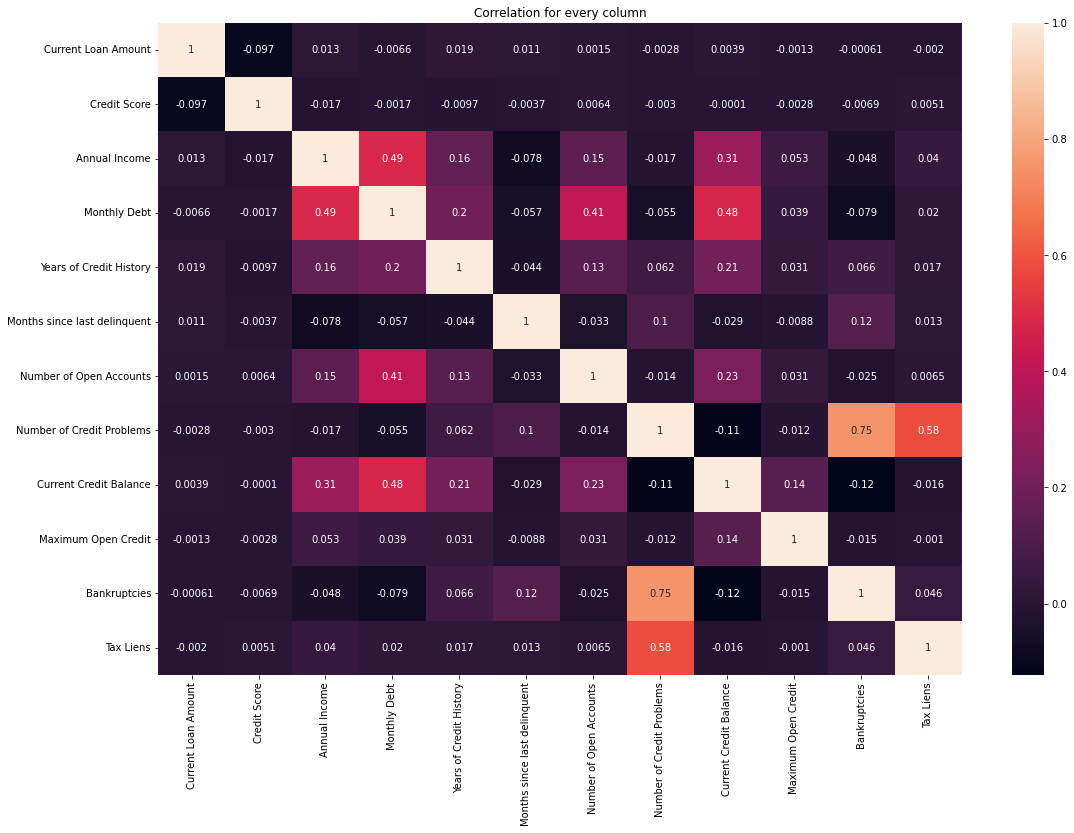

In [124]:
plt.figure(figsize=(18,12))
plt.title('Correlation for every column')
sns.heatmap(df.corr(),annot=True)

# Data Cleaning

In [125]:
df.drop("Loan ID",axis=1,inplace=True)
df.drop("Customer ID",axis=1,inplace=True)
df.drop("Purpose",axis=1,inplace=True)
df.drop("Home Ownership",axis=1,inplace=True)

In [126]:
df['Term'] = df['Term'].replace(" ", "")

In [127]:
df['Loan Status'] = df['Loan Status'].replace(" ", "")

In [128]:
df['Years in current job'].head()

0      8 years
1    10+ years
2      8 years
3      3 years
4      5 years
Name: Years in current job, dtype: object

In [129]:
df['Years in current job'] = df['Years in current job'].str.replace("years","")

In [130]:
df['Years in current job'] = df['Years in current job'].str.replace("+","")

In [131]:
df['Years in current job'] = df['Years in current job'].replace(">","")

In [132]:
df['Years in current job'] = df['Years in current job'].replace("<","")

In [133]:
df['Years in current job'] = df['Years in current job'].replace("year","")

In [134]:
df['Years in current job'].head()

0     8 
1    10 
2     8 
3     3 
4     5 
Name: Years in current job, dtype: object

In [135]:
df.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,445412.0,Short Term,709.0,1167493.0,8,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,Fully Paid,262328.0,Short Term,NaN,NaN,10,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,Fully Paid,347666.0,Long Term,721.0,806949.0,3,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,Fully Paid,176220.0,Short Term,NaN,NaN,5,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


<AxesSubplot:title={'center':'Correlation for every column'}>

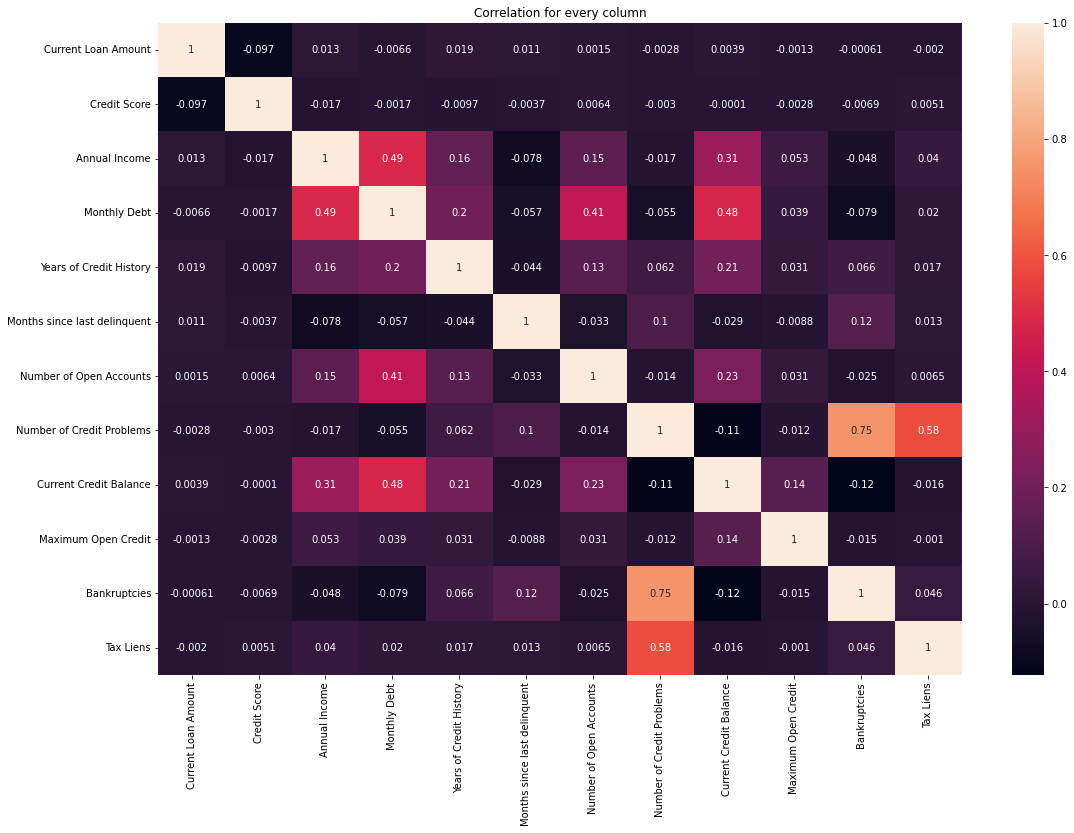

In [136]:
plt.figure(figsize=(18,12))
plt.title('Correlation for every column')
sns.heatmap(df.corr(),annot=True)

# Checking the NULL Value

In [137]:
df.isnull()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
1,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,False,False,False,True,True,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100509,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
100510,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
100511,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
100512,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [138]:
df.isnull().sum()

Loan Status                       514
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
dtype: int64

# Handling Null values

In [139]:
df.dropna(subset=['Months since last delinquent'], inplace=True)

In [140]:
df.dropna(subset=['Years in current job'], inplace=True)

In [141]:
mean_income = df['Annual Income'].mean()

In [142]:
df['Annual Income'].fillna(mean_income,inplace=True)

In [143]:
mean_score = df['Credit Score'].mean()

In [144]:
df['Credit Score'].fillna(mean_score,inplace=True)

In [145]:
mean_credit = df['Maximum Open Credit'].mean()

In [146]:
df['Maximum Open Credit'].fillna(mean_credit,inplace=True)

In [147]:
df.dropna(subset=['Bankruptcies'], inplace=True)

In [148]:
df.isnull().sum()

Loan Status                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Annual Income                   0
Years in current job            0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64

# Encoding

In [149]:
from sklearn.preprocessing import LabelEncoder

In [150]:
le = LabelEncoder()

In [151]:
from pandas.core.dtypes.common import is_numeric_dtype
for i in df.columns:
    if is_numeric_dtype(df[i]):
        continue
    else:
        df[i] = le.fit_transform(df[i])

In [152]:
df.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
1,1,262328.0,1,1056.180561,1.464039e+06,1,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,1,99999999.0,1,741.000000,2.231892e+06,8,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
6,1,217646.0,1,730.000000,1.184194e+06,10,10855.08,19.6,10.0,13.0,1.0,122170.0,272052.0,1.0,0.0
7,0,648714.0,0,1056.180561,1.464039e+06,10,14806.13,8.2,8.0,15.0,0.0,193306.0,864204.0,0.0,0.0
8,1,548746.0,1,678.000000,2.559110e+06,2,18660.28,22.6,33.0,4.0,0.0,437171.0,555038.0,0.0,0.0


# scaling

In [153]:
from sklearn.preprocessing import MinMaxScaler

In [154]:
mm = MinMaxScaler(feature_range=(0, 1))

In [155]:
df["Current Loan Amount"] = mm.fit_transform(df[["Current Loan Amount"]])

In [156]:
df["Credit Score"] = mm.fit_transform(df[["Credit Score"]])

In [157]:
df["Annual Income"] = mm.fit_transform(df[["Annual Income"]])

In [158]:
df["Monthly Debt"] = mm.fit_transform(df[["Monthly Debt"]])

In [159]:
df["Current Credit Balance"] = mm.fit_transform(df[["Current Credit Balance"]])

In [160]:
df["Maximum Open Credit"] = mm.fit_transform(df[["Maximum Open Credit"]])

In [161]:
df["Years of Credit History"] = mm.fit_transform(df[["Years of Credit History"]])

In [162]:
df["Months since last delinquent"] = mm.fit_transform(df[["Months since last delinquent"]])

In [163]:
df["Number of Open Accounts"] = mm.fit_transform(df[["Number of Open Accounts"]])

# separating X&Y

In [164]:
x = df.drop('Loan Status',axis=1)

In [165]:
y = df['Loan Status']

# CHeck the dataset imbalanced or not

In [166]:
df['Loan Status'].value_counts()

1    34915
0     9762
Name: Loan Status, dtype: int64

In [167]:
9762/(34915+9762) #0 class is just 21% of whole dataset. dataset is highly imbalabce

0.2185016899075587

<AxesSubplot:xlabel='Loan Status', ylabel='count'>

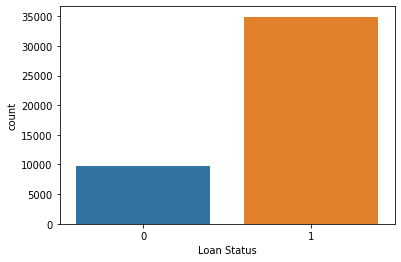

In [168]:
sns.countplot(df['Loan Status'])

# Separating Train & Test data

In [169]:
from sklearn.model_selection import train_test_split as tts

In [170]:
xtrain,xtest,ytrain,ytest = tts(x,y,test_size=0.2,random_state=10)

In [171]:
xtrain.head()

,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
43370,0.005533,0,0.007220,0.036796,4,0.033525,0.176912,0.090909,0.250000,0.0,0.019377,0.000548,0.0,0.0
91994,0.000197,1,0.019783,0.046237,9,0.080815,0.139430,0.159091,0.354167,0.0,0.013511,0.000748,0.0,0.0
2881,0.001891,1,0.021949,0.030279,1,0.072382,0.178411,0.437500,0.166667,0.0,0.061175,0.000772,0.0,0.0
91233,0.001202,1,0.068041,0.044025,1,0.100636,0.280360,0.261364,0.229167,0.0,0.015838,0.000417,0.0,0.0
49397,0.005037,0,0.896029,0.036595,9,0.141615,0.197901,0.289773,0.229167,0.0,0.046621,0.000679,0.0,0.0


In [172]:
xtest.head()

,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
18400,0.005339,1,0.022527,0.060985,1,0.076556,0.221889,0.414773,0.416667,0.0,0.049475,0.001429,0.0,0.0
24982,0.000261,1,0.018628,0.027328,1,0.060546,0.268366,0.096591,0.083333,0.0,0.027578,0.000360,0.0,0.0
5545,0.003558,1,0.068041,0.044025,1,0.043999,0.293853,0.107955,0.229167,0.0,0.017293,0.000278,0.0,0.0
92590,0.003225,0,0.019495,0.059811,9,0.195004,0.302849,0.085227,0.250000,0.0,0.019781,0.000277,0.0,0.0
25975,0.001785,1,0.019350,0.045697,0,0.070569,0.113943,0.096591,0.416667,0.0,0.024976,0.000454,0.0,0.0


# Accuracy before resampling Using Random Forest

In [173]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
rf_classifier = RandomForestClassifier(n_estimators=1000,max_features='log2',criterion='log_loss')

In [60]:
rf_classifier.fit(xtrain, ytrain)

RandomForestClassifier(criterion='log_loss', max_features='log2',
                       n_estimators=1000)

In [61]:
rf_classifier.score(xtest,ytest)

0.8301253357206804

# Synthetic Minority Oversampling Technique(SMOTE)

In [62]:
!pip install imblearn


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [63]:
from imblearn.combine import SMOTETomek
sm = SMOTETomek(random_state=44)

In [64]:
X,Y = sm.fit_resample(x,y)

In [65]:
Y.value_counts()

1    34416
0    34416
Name: Loan Status, dtype: int64

# Now we will separate this X&Y between Train & Test data

In [66]:
xtrain,xtest,ytrain,ytest = tts(X,Y,test_size=0.2,random_state=10)

# Accuracy after resampling(SMOTE) Using Random Forest

In [67]:
rf_classifier = RandomForestClassifier(n_estimators=1000,max_features='log2',criterion='log_loss')

In [68]:
rf_classifier.fit(xtrain, ytrain)

RandomForestClassifier(criterion='log_loss', max_features='log2',
                       n_estimators=1000)

In [69]:
rf_classifier.score(xtest,ytest)

0.8801481804314666

# Near Miss for under sampling

In [70]:
y.value_counts()

1    34915
0     9762
Name: Loan Status, dtype: int64

In [71]:
from imblearn.under_sampling import NearMiss

In [72]:
nm = NearMiss()
new_x, new_y  = nm.fit_resample(x,y)

In [73]:
new_y.value_counts()

0    9762
1    9762
Name: Loan Status, dtype: int64

In [74]:
xtrain,xtest,ytrain,ytest = tts(new_x,new_y,test_size=0.2,random_state=10)

In [75]:
xtrain.shape

(15619, 14)

In [76]:
rf_classifier = RandomForestClassifier(n_estimators=1000,max_features='log2',criterion='log_loss')

In [77]:
rf_classifier.fit(xtrain, ytrain)

RandomForestClassifier(criterion='log_loss', max_features='log2',
                       n_estimators=1000)

In [78]:
rf_classifier.score(xtest,ytest)

0.8153649167733675

# Oversampling

In [79]:
y.value_counts()

1    34915
0     9762
Name: Loan Status, dtype: int64

In [80]:
from imblearn.over_sampling import RandomOverSampler

In [81]:
over = RandomOverSampler(random_state=44)

In [82]:
x_new1, y_new1 = over.fit_resample(x,y)

In [83]:
y_new1.value_counts()

1    34915
0    34915
Name: Loan Status, dtype: int64

In [84]:
xtrain,xtest,ytrain,ytest = tts(x_new1, y_new1,test_size=0.2,random_state=10)

In [85]:
xtrain.shape

(55864, 14)

In [86]:
rf_classifier = RandomForestClassifier(n_estimators=1000,max_features='log2',criterion='log_loss')

In [87]:
rf_classifier.fit(xtrain, ytrain)

RandomForestClassifier(criterion='log_loss', max_features='log2',
                       n_estimators=1000)

In [88]:
rf_classifier.score(xtest,ytest)

0.961334669912645

# ADASYN (Adaptive Synthetic Sampling)

In [89]:
from imblearn.over_sampling import ADASYN

In [90]:
y.value_counts()

1    34915
0     9762
Name: Loan Status, dtype: int64

In [91]:
adasyn = ADASYN(random_state=42)

In [92]:
new_x2, new_y2  = adasyn.fit_resample(x,y)

In [93]:
new_y2.value_counts()

1    34915
0    33081
Name: Loan Status, dtype: int64

In [94]:
xtrain,xtest,ytrain,ytest = tts(new_x2,new_y2,test_size=0.2,random_state=10)

In [95]:
xtrain.shape

(54396, 14)

In [96]:
rf_classifier = RandomForestClassifier(n_estimators=1000,max_features='log2',criterion='log_loss')

In [97]:
rf_classifier.fit(xtrain, ytrain)

RandomForestClassifier(criterion='log_loss', max_features='log2',
                       n_estimators=1000)

In [98]:
rf_classifier.score(xtest,ytest)

0.8723529411764706

# RUSBoostClassifier

In [209]:
from imblearn.ensemble import RUSBoostClassifier

In [210]:
y.value_counts()

1    34915
0     9762
Name: Loan Status, dtype: int64

In [215]:
xtrain,xtest,ytrain,ytest = tts(x,y,test_size=0.2,random_state=10)

In [216]:
rusboost_clf = RUSBoostClassifier(
    base_estimator=RandomForestClassifier(random_state=42),
    sampling_strategy='auto',  # 'auto' adjusts the ratio based on the number of minority samples
    random_state=42
)

In [217]:
rusboost_clf.fit(xtrain, ytrain)

RUSBoostClassifier(base_estimator=RandomForestClassifier(random_state=42),
                   random_state=42)

In [218]:
rusboost_clf.score(xtest,ytest)

0.812667860340197